<a href="https://colab.research.google.com/github/mahmud-nobe/AstronomicalData/blob/main/HR_Diagram_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Getting the Isochrone

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)


In [4]:
file_name = "MIST_iso_61111e1a9588b.iso.cmd"

In [5]:
download('https://github.com/mahmud-nobe/AstronomicalData/raw/main/' +
         file_name)

Downloaded MIST_iso_61111e1a9588b.iso.cmd


In [6]:
download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
         'read_mist_models.py')
import read_mist_models

Downloaded read_mist_models.py


In [8]:
iso = read_mist_models.ISOCMD(file_name)

Reading in: MIST_iso_61111e1a9588b.iso.cmd


In [9]:
iso_array = iso.isocmds
data = pd.DataFrame(iso_array[0])
data.head()

,EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],Bessell_U,...,Gaia_RP_DR2Rev,Gaia_G_MAW,Gaia_BP_MAWb,Gaia_BP_MAWf,Gaia_RP_MAW,TESS,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,phase
0,10,5.0,0.100000,0.100000,3.468545,3.117013,-0.850039,0.0,0.041798,11.850742,...,7.245710,8.570848,10.815093,10.836660,7.218062,7.050297,8.586956,10.833892,7.221495,-1.0
1,11,5.0,0.102298,0.102298,3.469593,3.112695,-0.833437,0.0,0.041798,11.800797,...,7.201033,8.524260,10.759536,10.781235,7.173437,7.006680,8.540395,10.778332,7.176799,-1.0
2,12,5.0,0.106603,0.106603,3.471545,3.104731,-0.802504,0.0,0.041798,11.707819,...,7.117674,8.437310,10.655613,10.677575,7.090179,6.925337,8.453498,10.674408,7.093401,-1.0
3,13,5.0,0.110893,0.110893,3.473476,3.096969,-0.771909,0.0,0.041798,11.615778,...,7.034995,8.351029,10.552106,10.574348,7.007603,6.844711,8.367273,10.570904,7.010676,-1.0
4,14,5.0,0.115180,0.115180,3.475391,3.089426,-0.741606,0.0,0.041798,11.524315,...,6.952775,8.265177,10.448620,10.471163,6.925489,6.764601,8.281481,10.467423,6.928403,-1.0


## Getting the ZAMS

In [41]:
zams_path = 'https://github.com/mahmud-nobe/AstronomicalData/raw/main/ZAMS.txt'
zams_data = pd.read_csv(zams_path, sep=' ')
zams_data.head()

,Spectral Type,B-V color,U-B color,Mv Absolute V magnitude,Teff (Effective Temperature),log(T) = log10(effective temperature),BC_V (V-band bolometric correction),M_bol = Absolute Bolometric Magnitude (Sun's M_bol = 4.74),log(L/Lsun) [i.e. Sun has log(L/Lsun) = 0!]
0,O3V,-0.32,-1.22,-5.7,46000,4.663,-4.05,-9.75,5.80
1,O4V,-0.32,-1.20,-5.5,43000,4.633,-3.92,-9.42,5.67
2,O5V,-0.32,-1.19,-5.4,41500,4.618,-3.77,-9.20,5.58
3,O5.5V,-0.32,-1.18,-5.2,40000,4.602,-3.65,-8.90,5.46
4,O6V,-0.32,-1.17,-5.1,39000,4.591,-3.57,-8.67,5.37


In [42]:
zams_data.columns

Index(['Spectral Type', 'B-V color', 'U-B color', 'Mv Absolute V magnitude',
       'Teff (Effective Temperature)', 'log(T) = log10(effective temperature)',
       'BC_V (V-band bolometric correction)',
       'M_bol = Absolute Bolometric Magnitude (Sun's M_bol = 4.74)',
       'log(L/Lsun) [i.e. Sun has log(L/Lsun) = 0!]'],
      dtype='object')

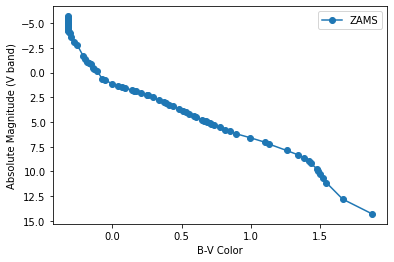

In [56]:
plt.plot(zams_data['B-V color'], zams_data['Mv Absolute V magnitude'], '-o', label = 'ZAMS')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis() 

## Plotting the Isochrone

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


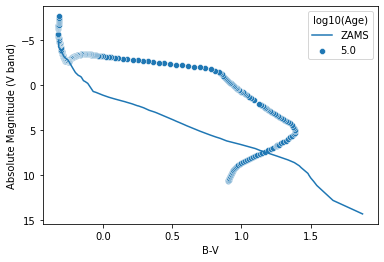

In [47]:
for i in np.linspace(0, 20, 1):
    data = pd.DataFrame(iso_array[int(i)])
    phase_mask = (data['phase'] > -1) & (data['phase'] <= 2)
    main_sequence = data#[phase_mask]
    cmd = sns.scatterplot(main_sequence.Bessell_B-main_sequence.Bessell_V, main_sequence.Bessell_V, 
                          label = str(data.log10_isochrone_age_yr[0]))
#sns.scatterplot(x = m67['bp_rp']-0.05, y = m67['phot_g_mean_mag']-9.2, data = m67, color = 'tab:blue')
#sns.scatterplot(x = m67['bp_rp']-E_bp_rp, y = m67['phot_g_mean_mag']-m67.distmod-A_g, data = m67,
 #               label = "Observed CMD \n (Mag - 9)", color = 'tab:blue')

sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')

plt.ylabel('Absolute Magnitude (V band)')
plt.legend(title = 'log10(Age)')
plt.xlabel('B-V')
#plt.xlim(-0.25,3)
plt.gca().invert_yaxis() 



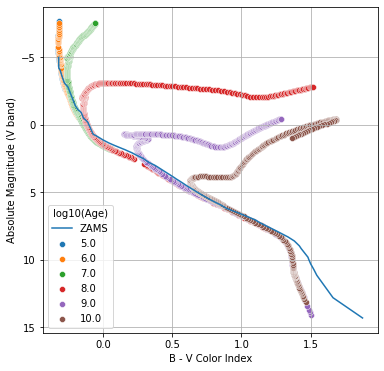

In [223]:
plt.figure(figsize=(6,6))

for i in np.linspace(0, 100, 6):
    data = pd.DataFrame(iso_array[int(i)])
    phase_mask = (data['phase'] > -1) & (data['phase'] <= 2)
    main_sequence = data[phase_mask]
    cmd = sns.scatterplot(x=main_sequence.Bessell_B-main_sequence.Bessell_V, y=main_sequence.Bessell_V, 
                          label = str(data.log10_isochrone_age_yr[0]))
#sns.scatterplot(x = m67['bp_rp']-0.05, y = m67['phot_g_mean_mag']-9.2, data = m67, color = 'tab:blue')
#sns.scatterplot(x = m67['bp_rp']-E_bp_rp, y = m67['phot_g_mean_mag']-m67.distmod-A_g, data = m67,
 #               label = "Observed CMD \n (Mag - 9)", color = 'tab:blue')

sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
plt.ylabel('Absolute Magnitude (V band)')
plt.legend(title = 'log10(Age)')
plt.xlabel('B - V Color Index')
#plt.xlim(-0.25,3)
plt.gca().invert_yaxis() 
plt.grid()
plt.show()


## Getting data for Clusters

In [68]:
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' +
         'data/gd1_data.hdf')

filename = 'gd1_data.hdf'
candidate_df = pd.read_hdf(filename, 'candidate_df')
candidate_df.head()

Downloaded gd1_data.hdf


,source_id,ra,dec,pmra,pmdec,best_neighbour_multiplicity,number_of_mates,g_mean_psf_mag,i_mean_psf_mag,phi1,phi2,pm_phi1,pm_phi2
0,635860218726658176,138.518707,19.092339,-5.941679,-11.346409,1,0,17.8978,17.517401,-59.247330,-2.016078,-7.527126,1.748779
1,635674126383965568,138.842874,19.031798,-3.897001,-12.702780,1,0,19.2873,17.678101,-59.133391,-2.306901,-7.560608,-0.741800
2,635535454774983040,137.837752,18.864007,-4.335041,-14.492309,1,0,16.9238,16.478100,-59.785300,-1.594569,-9.357536,-1.218492
3,635497276810313600,138.044516,19.009471,-7.172931,-12.291499,1,0,19.9242,18.334000,-59.557744,-1.682147,-9.000831,2.334407
4,635614168640132864,139.592197,18.807956,-3.309603,-13.708905,1,0,16.1516,14.666300,-58.938113,-3.024192,-8.062762,-1.869082


In [69]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.0 MB/s eta 0:00:00


In [71]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.gaia import TapPlus, GaiaClass   
from astroquery.vizier import Vizier
#import warnings
#warnings.filterwarnings('ignore')

### Globular: M13

In [88]:
#### Finding M13 catalogue

catalog_list = Vizier.find_catalogs('M13 photometry')
{k:v.description for k,v in catalog_list.items()}

{'II/248': 'UBV photometry and proper motions in M13 (Kadla, 1966)',
 'IV/26': 'Hercules Messier 13 (M13) photometry (Ludendorff, 1905)',
 'J/AJ/113/669': 'Stars in M13 core (Cohen+ 1997)',
 'J/AJ/122/3219': 'M3 and M13 CCD BV photometry (Rey+, 2001)',
 'J/MNRAS/474/4438': 'Stroemgren photometry of M13 (Savino+, 2018)'}

In [95]:
Vizier(catalog = 'J/AJ/122/3219', row_limit = -1).query_constraints()[1].to_pandas()

,RYL,Xpix,Ypix,Vmag,e_Vmag,B-V,e_B-V,_RA,_DE
0,1,466.760010,880.000000,14.242000,0.005,0.573,0.007,250.29547,36.51052
1,2,322.679993,1512.170044,14.308000,0.004,0.889,0.006,250.23557,36.52244
2,3,144.050003,115.669998,14.503000,0.004,0.844,0.006,250.36881,36.53407
3,4,1373.810059,235.600006,14.721000,0.004,0.597,0.006,250.35507,36.44021
4,5,54.150002,183.289993,14.736000,0.004,0.824,0.006,250.36255,36.54105
...,...,...,...,...,...,...,...,...,...
2147,5418,1328.339966,174.850006,18.767000,0.011,-0.324,0.016,250.36094,36.44359
2148,5419,1057.699951,84.610001,18.774000,0.009,-0.267,0.012,250.37003,36.46416
2149,5420,661.849976,222.360001,19.084000,0.009,-0.285,0.014,250.35768,36.49463
2150,5422,1721.750000,299.140015,20.254999,0.016,0.138,0.025,250.34838,36.41369


In [96]:
m13_data = Vizier(catalog = 'J/AJ/122/3219', row_limit = -1).query_constraints()[1].to_pandas()
m13_data.head()

,RYL,Xpix,Ypix,Vmag,e_Vmag,B-V,e_B-V,_RA,_DE
0,1,466.760010,880.000000,14.242,0.005,0.573,0.007,250.29547,36.51052
1,2,322.679993,1512.170044,14.308,0.004,0.889,0.006,250.23557,36.52244
2,3,144.050003,115.669998,14.503,0.004,0.844,0.006,250.36881,36.53407
3,4,1373.810059,235.600006,14.721,0.004,0.597,0.006,250.35507,36.44021
4,5,54.150002,183.289993,14.736,0.004,0.824,0.006,250.36255,36.54105


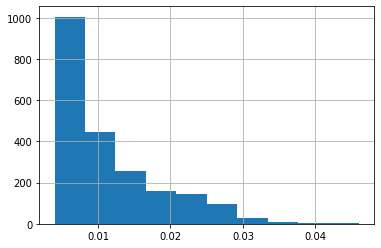

In [110]:
m13_data.e_Vmag.hist()

In [97]:
#m13_data['B-V'] = m13_data.bmag - m13_data.vmag

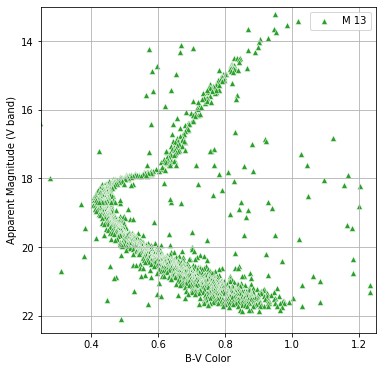

In [136]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = m13_data, y='Vmag', x='B-V', label = 'M 13', marker = '^', color='tab:green')

#sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
plt.ylabel('Apparent Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis() 
plt.xlim(0.25,1.25)
plt.ylim(22.5,13)
plt.grid()

### Globular: M15

In [79]:
m15_data = Vizier(catalog = 'J/AJ/124/3255', row_limit = -1).query_constraints()[0].to_pandas()
m15_data.head()

,VGG,dRA,dDE,Vmag,Bmag,Umag,_RA,_DE
0,1,16.343,10.269,20.466999,21.313,20.868999,322.49770,12.16976
1,2,18.180,8.384,20.889000,21.701,21.624001,322.49822,12.16924
2,3,7.251,19.504,20.271000,20.900,20.622999,322.49511,12.17233
3,4,18.725,7.807,19.363001,19.893,19.738001,322.49837,12.16908
4,5,2.529,24.193,20.256001,20.583,20.534000,322.49377,12.17363


In [80]:
m15_data['B-V'] = m15_data.Bmag - m15_data.Vmag

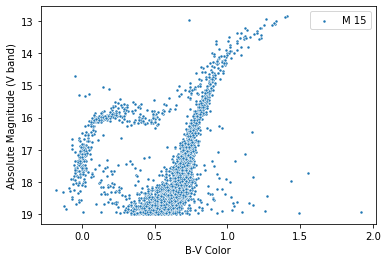

In [108]:
sns.scatterplot(data = m15_data[m15_data.Vmag < 19], y='Vmag', x='B-V', label = 'M 15', marker = '.')
#sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis() 

### Open: M45

In [160]:
#### Finding M45 catalogue

catalog_list = Vizier.find_catalogs('Pleiades')
{k:v.description for k,v in catalog_list.items()}

{'I/90': 'Positions of 502 Stars in Pleiades Region (Eichhorn+ 1970)',
 'I/163': 'US Naval Observatory Pleiades Catalog (Van Flandern 1969)',
 'I/258': 'Pleiades positions and proper motions (Wang+, 1996)',
 'II/131': 'Tonantzintla Pleiades Flare Stars (Haro+ 1982)',
 'J/ApJ/348/557': 'X-ray studies of stars in the Pleiades (Micela+, 1990)',
 'J/ApJ/602/L117': 'Oxygen in Pleiades and M34 dwarfs (Schuler+, 2004)',
 'J/ApJ/822/81': 'PTF stellar rotation periods for Pleiades members (Covey+, 2016)',
 'J/ApJ/901/91': 'Sp. obs. of rapidly rotating stars in the Pleiades (Torres, 2020)',
 'J/ApJ/904/140': 'Ruprecht 147 members & rot. data for 5 other cl. (Curtis+, 2020)',
 'J/ApJS/85/315': 'F, G and K dwarf stars of the Pleiades (Soderblom+ 1993)',
 'J/ApJS/91/625': 'ROSAT survey of the Pleiades (Stauffer+ 1994)',
 'J/ApJS/102/75': 'ROSAT Observations of the Pleiades (Micela+ 1996)',
 'J/ApJS/172/663': 'Infrared observations of the Pleiades (Stauffer+, 2007)',
 'J/A+A/299/696': 'Pleiades fiel

In [192]:
Vizier(catalog = 'J/ApJS/172/663', row_limit = -1).query_constraints()[0].to_pandas()

,RAJ2000,DEJ2000,Jmag,q_Jmag,Hmag,q_Hmag,Ksmag,q_Ksmag,r_Ksmag,_2M,Bmag,Vmag,Icmag,Ref,SimbadName
0,51.898273,24.528660,10.781,A,10.066,A,9.892,A,1,2M,NaN,NaN,11.85,22,Cl* Melotte 22 DH 001
1,51.925262,23.803688,9.066,A,8.754,A,8.679,A,1,2M,10.96,10.30,NaN,4,Cl* Melotte 22 PELS 121
2,51.976067,24.936478,12.880,A,12.219,A,11.981,A,1,2M,NaN,NaN,14.34,22,Cl* Melotte 22 DH 003
3,52.006481,23.078499,13.525,A,12.919,A,12.619,A,1,2M,NaN,NaN,15.05,22,Cl* Melotte 22 DH 004
4,52.168613,25.607782,10.198,A,9.883,A,9.723,A,1,2M,12.59,11.75,NaN,9,Cl* Melotte 22 AK III-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,60.956493,23.720613,13.886,A,13.255,A,12.996,A,1,2M,NaN,NaN,15.79,22,Cl* Melotte 22 DH 910
1412,61.147995,25.120106,10.470,A,10.003,A,9.947,E,1,2M,NaN,NaN,11.42,22,Cl* Melotte 22 DH 911
1413,61.190189,24.688738,12.736,A,12.062,A,11.768,A,1,2M,NaN,NaN,14.95,22,Cl* Melotte 22 DH 912
1414,61.307121,22.305193,13.367,A,12.719,A,12.412,A,1,2M,NaN,NaN,15.69,22,Cl* Melotte 22 DH 914


In [205]:
m45_data = Vizier(catalog = 'J/ApJS/172/663', row_limit = -1).query_constraints()[0].to_pandas()
m45_data.head()

,RAJ2000,DEJ2000,Jmag,q_Jmag,Hmag,q_Hmag,Ksmag,q_Ksmag,r_Ksmag,_2M,Bmag,Vmag,Icmag,Ref,SimbadName
0,51.898273,24.528660,10.781,A,10.066,A,9.892,A,1,2M,NaN,NaN,11.85,22,Cl* Melotte 22 DH 001
1,51.925262,23.803688,9.066,A,8.754,A,8.679,A,1,2M,10.96,10.30,NaN,4,Cl* Melotte 22 PELS 121
2,51.976067,24.936478,12.880,A,12.219,A,11.981,A,1,2M,NaN,NaN,14.34,22,Cl* Melotte 22 DH 003
3,52.006481,23.078499,13.525,A,12.919,A,12.619,A,1,2M,NaN,NaN,15.05,22,Cl* Melotte 22 DH 004
4,52.168613,25.607782,10.198,A,9.883,A,9.723,A,1,2M,12.59,11.75,NaN,9,Cl* Melotte 22 AK III-59


In [206]:
m45_data['B-V'] = m45_data.Bmag - m45_data.Vmag

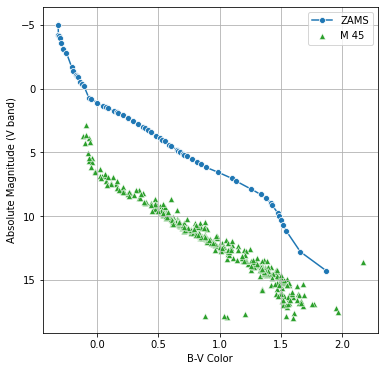

In [196]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = m45_data, y='Vmag', x='B-V', label = 'M 45', marker = '^', color='tab:green')
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS', marker = 'o')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
plt.show()

### Open: M67

In [210]:
#### Finding M45 catalogue

catalog_list = Vizier.find_catalogs('NGC 2682 photometry')
{k:v.description for k,v in catalog_list.items()}

{'J/A+A/470/585': 'NGC 2682 uvby-Hbeta photometry (Balaguer-Nunez+, 2007)'}

In [213]:
 Vizier(catalog = 'J/A+A/470/585', row_limit = -1).query_constraints()[1].to_pandas()

,n_Zhao,Zhao,San,Bmag,Vmag,pmX,e_pmX,pmY,e_pmY,MembP,MembNP,Nplates
0,,1,0,15.20,NaN,-6.3,1.8,-0.5,0.5,0.26,0.00,3
1,S,2,741,13.88,13.30,-2.1,0.7,9.1,0.9,0.00,0.00,8
2,S,3,730,13.34,12.67,4.5,0.9,7.9,0.5,0.00,0.00,7
3,S,4,1231,13.83,12.86,-0.7,0.6,-0.5,0.3,0.97,0.98,7
4,S,5,1033,14.68,NaN,-2.7,1.4,-7.4,1.0,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,S,1063,1608,15.05,14.24,0.5,0.5,0.1,0.6,0.96,0.97,5
1042,S,1064,1615,14.08,13.60,17.5,0.6,-11.8,0.4,0.00,0.00,7
1043,,1065,0,15.29,NaN,2.8,0.9,-1.4,2.4,0.26,0.91,4
1044,,1066,0,13.87,NaN,0.1,0.4,-1.1,0.5,0.92,0.98,8


In [219]:
m67_data = Vizier(catalog = 'J/A+A/484/609', row_limit = -1).query_constraints()[0].to_pandas()
m67_data.head()

,Seq,RAJ2000,DEJ2000,Bmag,Vmag,Icmag,pmRA,pmDE,Pmb,HRV
0,1,132.897815,11.575597,NaN,16.063999,NaN,1.730000,1.730000,95,34.250999
1,2,132.867489,11.576494,NaN,20.236000,NaN,0.060000,-1.250000,39,NaN
2,3,133.092502,11.576703,NaN,21.698000,NaN,13.860000,-5.120000,29,NaN
3,4,132.874183,11.577474,NaN,18.996000,NaN,7.140000,-7.260000,2,NaN
4,5,133.093782,11.577612,NaN,21.452000,NaN,22.370001,-22.549999,2,NaN


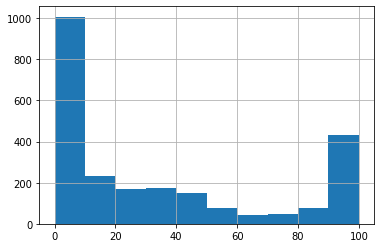

In [224]:
m67_data.Pmb.hist()

In [220]:
m67_data['B-V'] = m67_data.Bmag - m67_data.Vmag

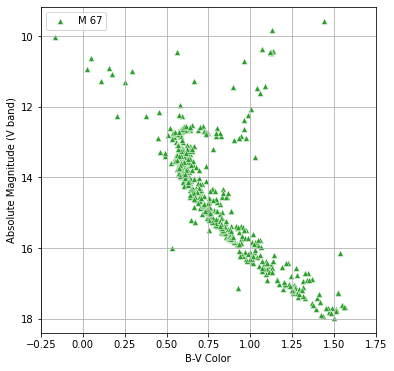

In [230]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = m67_data[m67_data.Pmb > 80], y='Vmag', x='B-V', label = 'M 67', marker = '^', color='tab:green')
#sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS', marker = 'o')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
plt.xlim(-0.25,1.75)
plt.show()

## Main sequence fitting

### M45

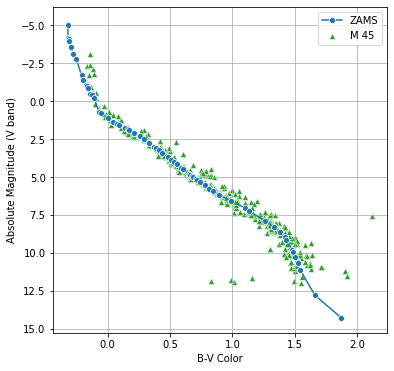

In [200]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = m45_data, y=m45_data['Vmag']-6, x=m45_data['B-V']-0.05, label = 'M 45', marker = '^', color='tab:green')
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS', marker = 'o')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
plt.show()

Distance Modulus, $M-m = 5 \log \frac{d}{10} \approx 6$

\begin{align*}
\therefore \text{Distance}, d &= 10\times 10^{\frac{M-m}{5}}\\
&\approx 10\times 10^{\frac{6}{5}}\, pc\\
&\approx 160 \, pc
\end{align*}



### M67

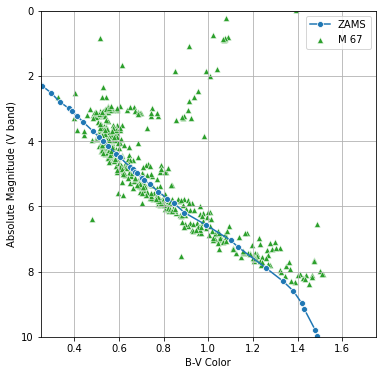

In [240]:
plt.figure(figsize=(6,6))
m67_data = m67_data[m67_data.Pmb > 80]
sns.scatterplot(x = m67_data['B-V']-0.05, y=m67_data['Vmag']-9.6, label = 'M 67', marker = '^', color='tab:green')
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS', marker = 'o')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
plt.xlim(0.25,1.75)
plt.ylim(10,0)
plt.show()

Distance Modulus, $M-m = 5 \log \frac{d}{10} \approx 9.6$

\begin{align*}
\therefore \text{Distance}, d &= 10\times 10^{\frac{M-m}{5}}\\
&\approx 10\times 10^{\frac{9.6}{5}}\, pc\\
&\approx 830 \, pc
\end{align*}



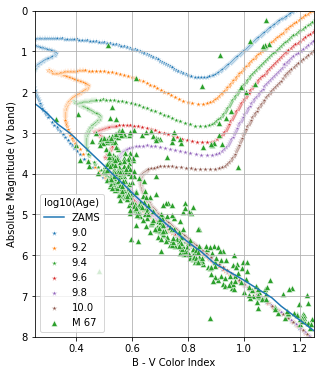

In [245]:
plt.figure(figsize=(5,6))

for i in np.linspace(80, 100, 6):
    data = pd.DataFrame(iso_array[int(i)])
    phase_mask = (data['phase'] > -1) & (data['phase'] <= 2)
    main_sequence = data[phase_mask]
    cmd = sns.scatterplot(x=main_sequence.Bessell_B-main_sequence.Bessell_V, y=main_sequence.Bessell_V, 
                          label = str(round(data.log10_isochrone_age_yr[0], 1)), marker = '*')
#sns.scatterplot(x = m67['bp_rp']-0.05, y = m67['phot_g_mean_mag']-9.2, data = m67, color = 'tab:blue')
#sns.scatterplot(x = m67['bp_rp']-E_bp_rp, y = m67['phot_g_mean_mag']-m67.distmod-A_g, data = m67,
 #               label = "Observed CMD \n (Mag - 9)", color = 'tab:blue')

sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
sns.scatterplot(x = m67_data['B-V']-0.05, y=m67_data['Vmag']-9.6, label = 'M 67', marker = '^', color='tab:green')
plt.ylabel('Absolute Magnitude (V band)')
plt.legend(title = 'log10(Age)')
plt.xlabel('B - V Color Index')
#plt.xlim(-0.25,3)
plt.gca().invert_yaxis() 
plt.grid()
plt.xlim(0.25,1.25)
plt.ylim(8,0)
plt.show()


It goes between 9.6 and 9.8, so log(age) $\approx 9.7$, 

Thus, age $\approx 10^{9.7} = 5 \times 10^9 year$

In [250]:
np.linspace(80, 100, 6)

array([ 80.,  84.,  88.,  92.,  96., 100.])

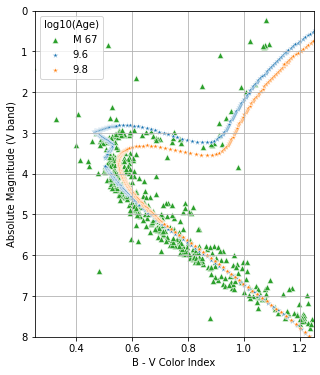

In [252]:
plt.figure(figsize=(5,6))

sns.scatterplot(x = m67_data['B-V']-0.05, y=m67_data['Vmag']-9.6, label = 'M 67', marker = '^', color='tab:green')

for i in np.linspace(92, 96, 2):
    data = pd.DataFrame(iso_array[int(i)])
    phase_mask = (data['phase'] > -1) & (data['phase'] <= 2)
    main_sequence = data[phase_mask]
    cmd = sns.scatterplot(x=main_sequence.Bessell_B-main_sequence.Bessell_V, y=main_sequence.Bessell_V, 
                          label = str(round(data.log10_isochrone_age_yr[0], 1)), marker = '*')
#sns.scatterplot(x = m67['bp_rp']-0.05, y = m67['phot_g_mean_mag']-9.2, data = m67, color = 'tab:blue')
#sns.scatterplot(x = m67['bp_rp']-E_bp_rp, y = m67['phot_g_mean_mag']-m67.distmod-A_g, data = m67,
 #               label = "Observed CMD \n (Mag - 9)", color = 'tab:blue')

#sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
plt.ylabel('Absolute Magnitude (V band)')
plt.legend(title = 'log10(Age)')
plt.xlabel('B - V Color Index')
#plt.xlim(-0.25,3)
plt.gca().invert_yaxis() 
plt.grid()
plt.xlim(0.25,1.25)
plt.ylim(8,0)
plt.show()


## M13

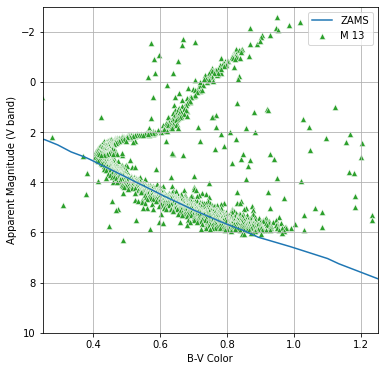

In [180]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = m13_data, y=m13_data['Vmag']-15.8, x='B-V', label = 'M 13', marker = '^', color='tab:green')

sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
plt.ylabel('Apparent Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis() 
plt.xlim(0.25,1.25)
plt.ylim(10,-3)
plt.grid()

In [184]:
np.linspace(0, 100, 6)

array([  0.,  20.,  40.,  60.,  80., 100.])

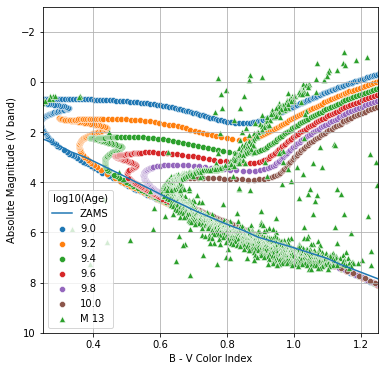

In [191]:
plt.figure(figsize=(6,6))

for i in np.linspace(80, 100, 6):
    data = pd.DataFrame(iso_array[int(i)])
    phase_mask = (data['phase'] > -1) & (data['phase'] <= 2)
    main_sequence = data[phase_mask]
    cmd = sns.scatterplot(x=main_sequence.Bessell_B-main_sequence.Bessell_V, y=main_sequence.Bessell_V, 
                          label = str(round(data.log10_isochrone_age_yr[0], 1)))
#sns.scatterplot(x = m67['bp_rp']-0.05, y = m67['phot_g_mean_mag']-9.2, data = m67, color = 'tab:blue')
#sns.scatterplot(x = m67['bp_rp']-E_bp_rp, y = m67['phot_g_mean_mag']-m67.distmod-A_g, data = m67,
 #               label = "Observed CMD \n (Mag - 9)", color = 'tab:blue')

sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS')
sns.scatterplot(data = m13_data, y=m13_data['Vmag']-14.4, x=m13_data['B-V']+0.2, label = 'M 13', marker = '^', color='tab:green')
plt.ylabel('Absolute Magnitude (V band)')
plt.legend(title = 'log10(Age)')
plt.xlabel('B - V Color Index')
#plt.xlim(-0.25,3)
plt.gca().invert_yaxis() 
plt.grid()
plt.xlim(0.25,1.25)
plt.ylim(10,-3)
plt.show()


## Empirical Model 

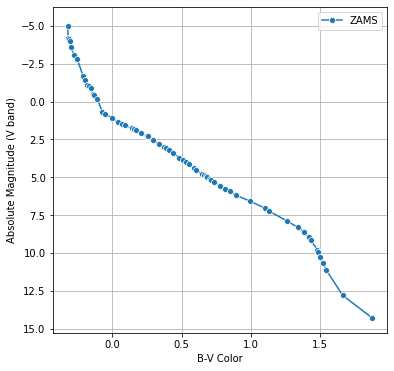

In [247]:
plt.figure(figsize=(6,6))
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS', marker = 'o')
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
#plt.xlim(0.25,1.75)
#plt.ylim(10,0)
plt.show()

Let's imagine a cluster that is 300 persec away from us.

\begin{align*}
\therefore \text{Distance Modulus}, M-m &= 5 \log \frac{d}{10}\\
&= 5 \log \frac{300}{10}\\
&\approx 7.4
\end{align*}

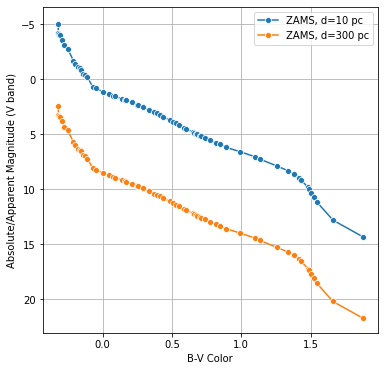

In [253]:
plt.figure(figsize=(6,6))
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS, d=10 pc', marker = 'o')
sns.lineplot(data = zams_data, y=zams_data['Mv Absolute V magnitude']+7.4, x='B-V color', label = 'ZAMS, d=300 pc', marker = 'o')
plt.ylabel('Absolute/Apparent Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
#plt.xlim(0.25,1.75)
#plt.ylim(10,0)
plt.show()

Now, if the average extinction in V band through the line of sight of the cluster is around $A_v = 1.0 \, \text{mag}/\text{kpc}$ 

Then, the total V-band extinction for this cluster is, $A_v = 1.0 * 0.3 = 0.3 \, \text{}mag$

The relationship between color excess (difference between actual color and observed color) and V-band extinction is (see the ref below),

$$ E_{B-V} = \frac{1}{3.1} A_v = \frac{0.3}{3.1} \approx 0.1$$

Thus the CMD (color magnitude diagram) of this cluster will be shifter another 0.3 mag downward and 0.1 unit to the right.

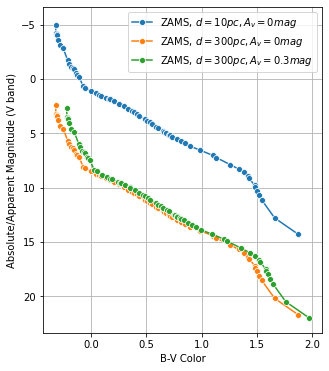

In [259]:
plt.figure(figsize=(5,6))
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS, $d=10 pc, A_v=0 mag$', marker = 'o')
sns.lineplot(data = zams_data, y=zams_data['Mv Absolute V magnitude']+7.4, x='B-V color', label = 'ZAMS, $d=300 pc, A_v=0 mag$', marker = 'o')
sns.lineplot(data = zams_data, y=zams_data['Mv Absolute V magnitude']+7.4+0.3, x=zams_data['B-V color']+0.1, label = 'ZAMS, $d=300 pc, A_v=0.3 mag$', marker = 'o')
plt.ylabel('Absolute/Apparent Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
#plt.xlim(0.25,1.75)
#plt.ylim(10,0)
plt.show()

Using same logic, now consider a cluster with a distance of $d = 3\, kpc$

Distance Modulus, $M-m \approx = 12.4$

Total V band Extinction, $A_v \approx 3 \, mag$

Color Excess (or redenning), $E_{B-V} \approx 1$

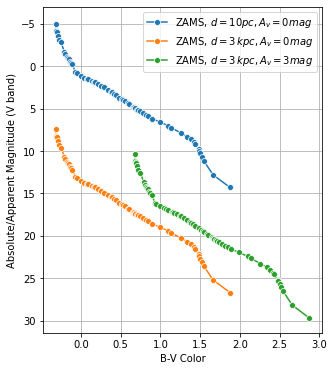

In [261]:
plt.figure(figsize=(5,6))
sns.lineplot(data = zams_data, y='Mv Absolute V magnitude', x='B-V color', label = 'ZAMS, $d=10 pc, A_v=0 mag$', marker = 'o')
sns.lineplot(data = zams_data, y=zams_data['Mv Absolute V magnitude']+12.4, x='B-V color', label = 'ZAMS, $d=3 \, kpc, A_v=0 mag$', marker = 'o')
sns.lineplot(data = zams_data, y=zams_data['Mv Absolute V magnitude']+12.4+3, x=zams_data['B-V color']+1, label = 'ZAMS, $d=3 \, kpc, A_v=3 mag$', marker = 'o')
plt.ylabel('Absolute/Apparent Magnitude (V band)')
plt.xlabel('B-V Color')
plt.legend()
plt.gca().invert_yaxis()
plt.grid() 
#plt.xlim(0.25,1.75)
#plt.ylim(10,0)
plt.show()

### Reference table:

http://www.astro.sunysb.edu/metchev/PHY517_AST443/extinction_lab.pdf

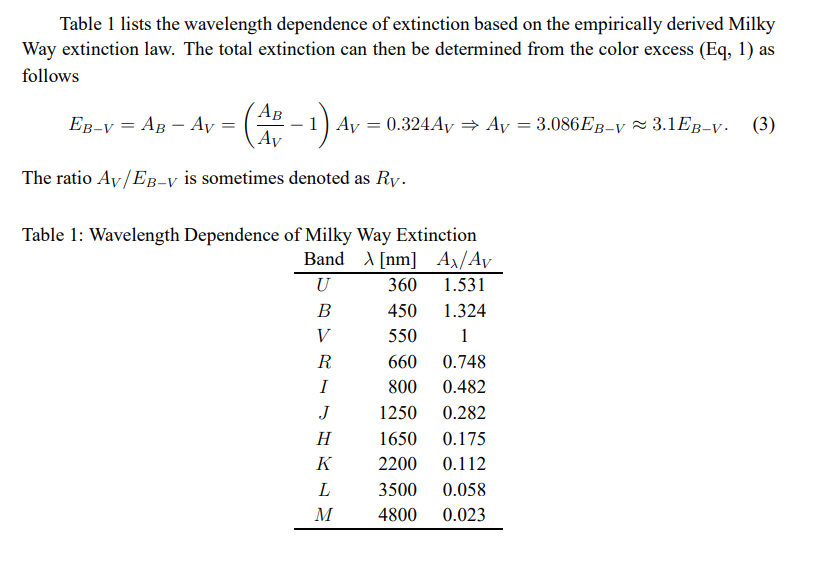